# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [7]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [8]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...
1,✅ Trip Verified | Not only my first flight in...
2,✅ Trip Verified | My husband and myself were ...
3,✅ Trip Verified | Organised boarding process. ...
4,✅ Trip Verified | Outward journey BA245 Londo...


In [ ]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [15]:
df

,reviews
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...
1,✅ Trip Verified | Not only my first flight in...
2,✅ Trip Verified | My husband and myself were ...
3,✅ Trip Verified | Organised boarding process. ...
4,✅ Trip Verified | Outward journey BA245 Londo...
...,...
995,✅ Trip Verified | Madrid to London. Credit whe...
996,✅ Trip Verified | Venice to Gatwick. I use Sno...
997,✅ Trip Verified | First 3 legs were trouble fr...
998,✅ Trip Verified | Flew London to Budapest with...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [12]:
df.describe()

,reviews
count,1000
unique,1000
top,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...
freq,1


In [ ]:
import matplotlib.pyplot as plt

In [16]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [17]:
df

,reviews
0,BA 242 on the 6/2/23. Boarding was delayed du...
1,"Not only my first flight in 17 years, but al..."
2,My husband and myself were flying to Madrid ...
3,Organised boarding process. Really friendly c...
4,Outward journey BA245 London to Buenos Aires...
...,...
995,Madrid to London. Credit where it's due. Flew...
996,Venice to Gatwick. I use Snokart luggage whic...
997,First 3 legs were trouble free. Lounges were ...
998,Flew London to Budapest with British Airways....


## The lexicon based approach
the text will be labeled based on 
- neutral
- positive
- negative

the types of lexicon based approach includes 
- textblob
- vader
- sentiwordnet

#### Data preprocessing steps
- text cleaning
- tokenization
- enrichment - POS tagging ; parts of speech
- stopwords removal
- obtaining the stem words

In [18]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,BA 242 on the 6/2/23. Boarding was delayed du...,BA on the Boarding was delayed due to late ar...
1,"Not only my first flight in 17 years, but al...",Not only my first flight in years but also my...
2,My husband and myself were flying to Madrid ...,My husband and myself were flying to Madrid o...
3,Organised boarding process. Really friendly c...,Organised boarding process Really friendly cr...
4,Outward journey BA245 London to Buenos Aires...,Outward journey BA London to Buenos Aires Clu...


In [19]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


In [20]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,BA 242 on the 6/2/23. Boarding was delayed du...,BA on the Boarding was delayed due to late ar...,"[(BA, n), (Boarding, n), (delayed, v), (due, a..."
1,"Not only my first flight in 17 years, but al...",Not only my first flight in years but also my...,"[(first, a), (flight, n), (years, n), (also, r..."
2,My husband and myself were flying to Madrid ...,My husband and myself were flying to Madrid o...,"[(husband, n), (flying, v), (Madrid, n), (rd, ..."
3,Organised boarding process. Really friendly c...,Organised boarding process Really friendly cr...,"[(Organised, v), (boarding, v), (process, n), ..."
4,Outward journey BA245 London to Buenos Aires...,Outward journey BA London to Buenos Aires Clu...,"[(Outward, n), (journey, n), (BA, n), (London,..."


In [21]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,BA 242 on the 6/2/23. Boarding was delayed du...,BA on the Boarding was delayed due to late ar...,"[(BA, n), (Boarding, n), (delayed, v), (due, a...",BA Boarding delay due late arrival incoming ...
1,"Not only my first flight in 17 years, but al...",Not only my first flight in years but also my...,"[(first, a), (flight, n), (years, n), (also, r...",first flight year also first time back Engla...
2,My husband and myself were flying to Madrid ...,My husband and myself were flying to Madrid o...,"[(husband, n), (flying, v), (Madrid, n), (rd, ...",husband fly Madrid rd February Legal matter ...
3,Organised boarding process. Really friendly c...,Organised boarding process Really friendly cr...,"[(Organised, v), (boarding, v), (process, n), ...",Organised board process Really friendly crew...
4,Outward journey BA245 London to Buenos Aires...,Outward journey BA London to Buenos Aires Clu...,"[(Outward, n), (journey, n), (BA, n), (London,...",Outward journey BA London Buenos Aires Club ...


In [22]:
df[['reviews','Lemma']]

,reviews,Lemma
0,BA 242 on the 6/2/23. Boarding was delayed du...,BA Boarding delay due late arrival incoming ...
1,"Not only my first flight in 17 years, but al...",first flight year also first time back Engla...
2,My husband and myself were flying to Madrid ...,husband fly Madrid rd February Legal matter ...
3,Organised boarding process. Really friendly c...,Organised board process Really friendly crew...
4,Outward journey BA245 London to Buenos Aires...,Outward journey BA London Buenos Aires Club ...
...,...,...
995,Madrid to London. Credit where it's due. Flew...,Madrid London Credit due Flew club Europe cr...
996,Venice to Gatwick. I use Snokart luggage whic...,Venice Gatwick use Snokart luggage design zi...
997,First 3 legs were trouble free. Lounges were ...,First leg trouble free Lounges good staff go...
998,Flew London to Budapest with British Airways....,Flew London Budapest British Airways Massive...


#### sentiment analysis using VADER

- It is able to tell if a statement is positive or negative

In [23]:
!pip install vaderSentiment

In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,BA 242 on the 6/2/23. Boarding was delayed du...,BA on the Boarding was delayed due to late ar...,"[(BA, n), (Boarding, n), (delayed, v), (due, a...",BA Boarding delay due late arrival incoming ...,0.9493,Positive
1,"Not only my first flight in 17 years, but al...",Not only my first flight in years but also my...,"[(first, a), (flight, n), (years, n), (also, r...",first flight year also first time back Engla...,0.9869,Positive
2,My husband and myself were flying to Madrid ...,My husband and myself were flying to Madrid o...,"[(husband, n), (flying, v), (Madrid, n), (rd, ...",husband fly Madrid rd February Legal matter ...,0.9799,Positive
3,Organised boarding process. Really friendly c...,Organised boarding process Really friendly cr...,"[(Organised, v), (boarding, v), (process, n), ...",Organised board process Really friendly crew...,0.9371,Positive
4,Outward journey BA245 London to Buenos Aires...,Outward journey BA London to Buenos Aires Clu...,"[(Outward, n), (journey, n), (BA, n), (London,...",Outward journey BA London Buenos Aires Club ...,-0.1119,Negative


In [25]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    537
Negative    353
Neutral     110
Name: Analysis, dtype: int64

### visualization


([<matplotlib.patches.Wedge at 0x2608c6ea8e0>,
 [Text(-0.12757508092656847, 1.0925770447554624, 'Positive'),
  Text(-0.25006438374722234, -1.071199236361342, 'Negative'),
  Text(1.2701889961293427, -0.45729630887634853, 'Neutral')],
 [Text(-0.06958640777812825, 0.5959511153211613, '53.7%'),
  Text(-0.13639875477121216, -0.584290492560732, '35.3%'),
  Text(0.799748627192549, -0.287927305588812, '11.0%')])

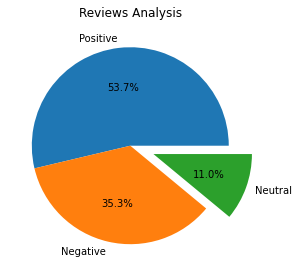

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [27]:
df.to_csv("BA_reviews.csv")

### wordcloud

- Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [32]:
!pip install WordCloud

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

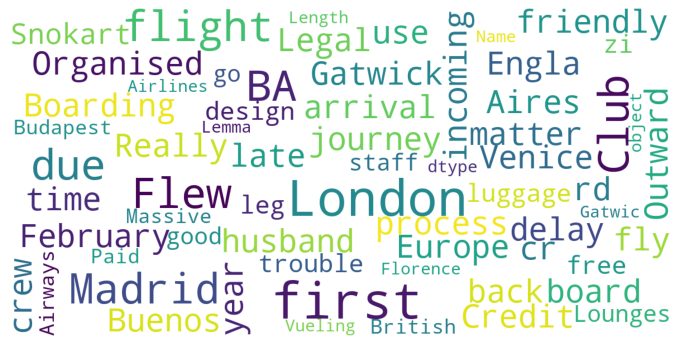

In [34]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)